## PROBLEM

There are many scientific data servers available, like OPeNDAP, WCS, SOS, OBIS, etc. They all have their advantages and disadvantages in terms of file formats, downloading and subsetting protocals, This may pose a big challange to beginners o how to choose a relianble server. ERDDAP goal is to fill the gaps and unify most of the advantages in a single service. It acts as a middleman by reformatting the request into the format required by the remote server, and reformats the data into the format that you requested. These are the file format obtained through ERDDAP; html table, ESRI .asc and .csv, Google Earth .kml, OPeNDAP binary, .mat, .nc, ODV .txt, .csv, .tsv, .json, and .xhtml, and even some image formats (.png and .pdf).

## SOLUTION

In this notebook, we will use xarray python library to access, download, and process satellite data from ERDDAP server

## CASE STUDY

Let's choose the region of interest and the case that we can address using xarray library and ERDDAP server. By oberserving the change in Sea Surface Temperature (SST) from 2018-2022.

## Spatial and temporal variability of Sea Surface temperature in the western Indion Ocean Waters, Tanzania

In [ ]:
## Create an Interactive map to visulize the region of Interest (ROI)

In [ ]:
## Import python Library

In [3]:
import ee
import geemap

In [13]:
Map = geemap.Map(center = [-7.207,39.5123],Zoom = 19)
Map.add_basemap('SATELLITE')
Map

Map(center=[-7.207, 39.5123], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(chil…

## Access and Download satellite data from ERDDAP server (NOAA)

In [15]:
import urllib.request 
import xarray as xr 
import netCDF4 as nc

url="https://coastwatch.pfeg.noaa.gov/erddap/griddap/jplMURSST41mday.nc?sst%5B(2017-06-16T00:00:00Z):1:(2022-06-16T00:00:00Z)%5D%5B(-10.6):1:(-4.5)%5D%5B(38.5):1:(40.5)%5D" 
urllib.request.urlretrieve(url, "sst.nc")

('sst.nc', <http.client.HTTPMessage at 0x1f2a6c79750>)

In [16]:
ds = xr.open_dataset('sst.nc',decode_cf=True)

In [80]:
ds

<xarray.Dataset>
Dimensions:    (time: 61, latitude: 611, longitude: 201)
Coordinates:
  * time       (time) datetime64[ns] 2017-06-16 2017-07-16 ... 2022-06-16
  * latitude   (latitude) float32 -10.6 -10.59 -10.58 ... -4.52 -4.51 -4.5
  * longitude  (longitude) float32 38.5 38.51 38.52 38.53 ... 40.48 40.49 40.5
Data variables:
    sst        (time, latitude, longitude) float32 ...
Attributes: (12/40)
    cdm_data_type:              Grid
    Conventions:                CF-1.6, COARDS, ACDD-1.3
    creation_date:              2022-07-03
    creator_email:              erd.data@noaa.gov
    creator_name:               NOAA NMFS SWFSC ERD and NOAA NESDIS CoastWatc...
    creator_type:               institution
    ...                         ...
    summary:                    A monthly mean Sea Surface Temperature (SST) ...
    testOutOfDate:              now-60days
    time_coverage_end:          2022-06-16T00:00:00Z
    time_coverage_start:        2017-06-16T00:00:00Z
    title:                      Multi-scale Ultra-high Resolution (MUR) SST A...
    Westernmost_Easting:        38.5

In [81]:
ds.sst

<xarray.DataArray 'sst' (time: 61, latitude: 611, longitude: 201)>
[7491471 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-06-16 2017-07-16 ... 2022-06-16
  * latitude   (latitude) float32 -10.6 -10.59 -10.58 ... -4.52 -4.51 -4.5
  * longitude  (longitude) float32 38.5 38.51 38.52 38.53 ... 40.48 40.49 40.5
Attributes:
    colorBarMaximum:  32.0
    colorBarMinimum:  0.0
    ioos_category:    Temperature
    long_name:        Sea Surface Temperature Monthly Mean
    standard_name:    sea_surface_foundation_temperature
    units:            degree_C

In [82]:
ds.sst.dims

('time', 'latitude', 'longitude')

In [83]:
monthly = ds.sel(time = slice('2018-06-01','2022-06-01'))

In [84]:
season = monthly.groupby('time.season').mean()

In [85]:
season

<xarray.Dataset>
Dimensions:    (latitude: 611, longitude: 201, season: 4)
Coordinates:
  * latitude   (latitude) float32 -10.6 -10.59 -10.58 ... -4.52 -4.51 -4.5
  * longitude  (longitude) float32 38.5 38.51 38.52 38.53 ... 40.48 40.49 40.5
  * season     (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    sst        (season, latitude, longitude) float32 nan nan nan ... 27.16 27.17

In [86]:
reindex_season = season.reindex(col = ['DJF','MAM','JJA','SON'])
reindex_season

<xarray.Dataset>
Dimensions:    (latitude: 611, longitude: 201, season: 4)
Coordinates:
  * latitude   (latitude) float32 -10.6 -10.59 -10.58 ... -4.52 -4.51 -4.5
  * longitude  (longitude) float32 38.5 38.51 38.52 38.53 ... 40.48 40.49 40.5
  * season     (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    sst        (season, latitude, longitude) float32 nan nan nan ... 27.16 27.17

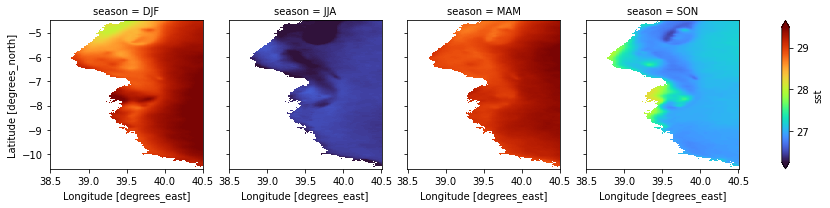

In [88]:
import matplotlib.pyplot as plt
reindex_season.sst.plot(col = 'season',col_wrap=4, robust=True,  cmap='turbo')
plt.show()

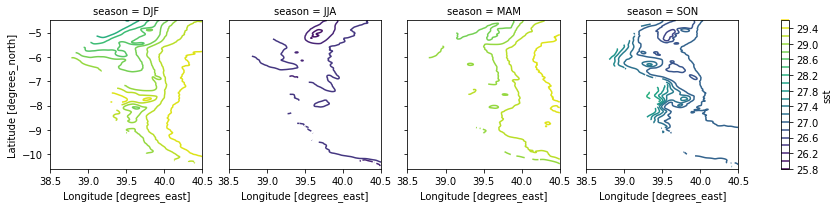

In [96]:
# contours
reindex_season.sst.plot.contour(col="season", levels=20, add_colorbar=True)
plt.show()

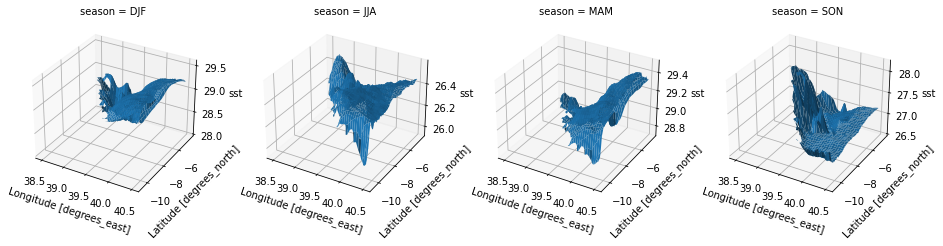

In [110]:
reindex_season.sst.plot.surface(col = 'season')
plt.show()

In [97]:
this_year = ds.sel(time = slice('2022-01-01','2022-07-01'))
this_year

<xarray.Dataset>
Dimensions:    (time: 6, latitude: 611, longitude: 201)
Coordinates:
  * time       (time) datetime64[ns] 2022-01-16 2022-02-16 ... 2022-06-16
  * latitude   (latitude) float32 -10.6 -10.59 -10.58 ... -4.52 -4.51 -4.5
  * longitude  (longitude) float32 38.5 38.51 38.52 38.53 ... 40.48 40.49 40.5
Data variables:
    sst        (time, latitude, longitude) float32 ...
Attributes: (12/40)
    cdm_data_type:              Grid
    Conventions:                CF-1.6, COARDS, ACDD-1.3
    creation_date:              2022-07-03
    creator_email:              erd.data@noaa.gov
    creator_name:               NOAA NMFS SWFSC ERD and NOAA NESDIS CoastWatc...
    creator_type:               institution
    ...                         ...
    summary:                    A monthly mean Sea Surface Temperature (SST) ...
    testOutOfDate:              now-60days
    time_coverage_end:          2022-06-16T00:00:00Z
    time_coverage_start:        2017-06-16T00:00:00Z
    title:                      Multi-scale Ultra-high Resolution (MUR) SST A...
    Westernmost_Easting:        38.5

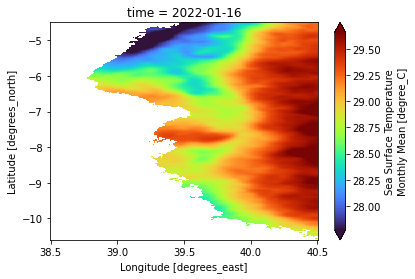

In [134]:
this_year.sst[0].plot(col_wrap=4, robust=True,  cmap='turbo')
plt.show()

In [182]:
import matplotlib.pyplot as plt

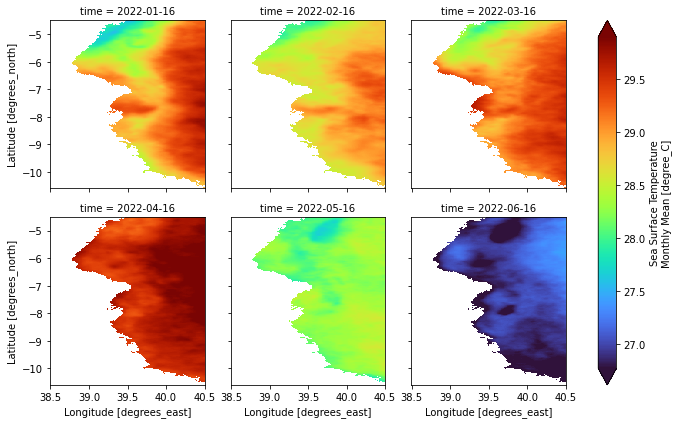

In [186]:
this_year.sst.plot(col = 'time', col_wrap=3,robust=True,  cmap='turbo')

plt.savefig('test_022.jpg',dpi=300)

In [145]:
plt.savefig('wio-test.jpg',dpi=300)

<Figure size 432x288 with 0 Axes>

## OBSERVATIONS

From the Analysis results, we found that there is a high variation of SST overtime.In this year, SST was higher (29.5) in April
and lower (27.0) in June. Seasonally, The mean seasoanl variation of SST was higher (29) in DJF and MAM, and lower in JJA and SON (26-28)